In [2]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('C:/Users/User/Downloads/crop-recommendation-system-based-on-machine-learning-using-python-master/Data/crop_recommendation.csv')
print(df.describe())
df.head()

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.size

17600

In [5]:
df.shape

(2200, 8)

In [6]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [9]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [10]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [11]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [12]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.3,random_state =42,stratify = labels)

Descion Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.75757575757576
              precision    recall  f1-score   support

       apple       0.97      1.00      0.98        30
      banana       0.97      1.00      0.98        30
   blackgram       0.64      0.97      0.77        30
    chickpea       0.97      1.00      0.98        30
     coconut       1.00      1.00      1.00        30
      coffee       1.00      0.97      0.98        30
      cotton       0.83      1.00      0.91        30
      grapes       1.00      1.00      1.00        30
        jute       1.00      0.07      0.12        30
 kidneybeans       1.00      0.77      0.87        30
      lentil       0.91      1.00      0.95        30
       maize       0.92      0.80      0.86        30
       mango       1.00      0.87      0.93        30
   mothbeans       1.00      0.60      0.75        30
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [17]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

Saving trained Decision Tree model

Support Vector Machine (SVM)

In [18]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9893939393939394
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        30
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       0.97      1.00      0.98        30
      grapes       1.00      1.00      1.00        30
        jute       0.86      1.00      0.92        30
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.97      0.98        30
       maize       1.00      0.97      0.98        30
       mango       1.00      1.00      1.00        30
   mothbeans       0.97      1.00      0.98        30
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.0

In [19]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.975     , 0.98863636, 0.98863636, 0.98181818])

#Saving trained SVM model


Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9484848484848485
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        30
   blackgram       0.79      0.73      0.76        30
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       0.81      0.97      0.88        30
      grapes       1.00      1.00      1.00        30
        jute       0.86      1.00      0.92        30
 kidneybeans       1.00      1.00      1.00        30
      lentil       0.83      0.83      0.83        30
       maize       0.85      0.77      0.81        30
       mango       1.00      1.00      1.00        30
   mothbeans       0.77      0.80      0.79        30
    mungbean       1.00      0.97      0.98        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00   

In [21]:
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

Saving trained Logistic Regression model

Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        30
   blackgram       1.00      0.97      0.98        30
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        30
      grapes       1.00      1.00      1.00        30
        jute       0.97      1.00      0.98        30
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.97      0.98        30
       maize       0.97      1.00      0.98        30
       mango       1.00      1.00      1.00        30
   mothbeans       0.97      1.00      0.98        30
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00

In [23]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

Saving trained Random Forest model

In [24]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename =( 'C:/Users/User/Downloads/crop-recommendation-system-based-on-machine-learning-using-python-master/models/RandomForest.pkl')
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

XG Boost 


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ytrain = le.fit_transform(Ytrain)
Ytest = le.fit_transform(Ytest)

In [26]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))


XGBoost's Accuracy is:  0.9924242424242424
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       0.97      1.00      0.98        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.97      1.00      0.98        30
           9       1.00      1.00      1.00        30
          10       1.00      0.93      0.97        30
          11       1.00      1.00      1.00        30
          12       1.00      1.00      1.00        30
          13       0.94      1.00      0.97        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00     

In [27]:
target=le.fit_transform(target)

In [28]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

array([0.99318182, 0.99318182, 0.99318182, 0.99090909, 0.99090909])

Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

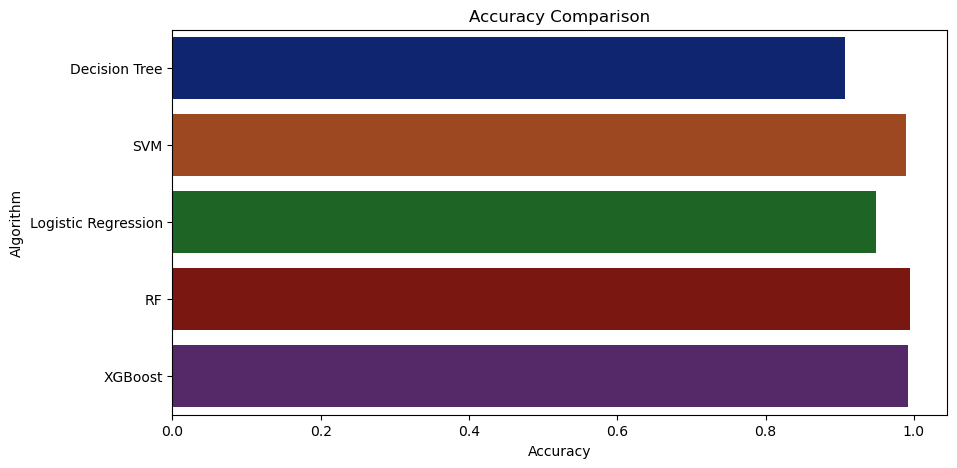

In [29]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [30]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9075757575757576
SVM --> 0.9893939393939394
Logistic Regression --> 0.9484848484848485
RF --> 0.9954545454545455
XGBoost --> 0.9924242424242424


Making a prediction

In [ ]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [ ]:
data = np.array([[88, 42, 53, 30, 64, 7, 250.9]])
prediction = RF.predict(data)
print(prediction)

['rice']


In [ ]:
data = np.array([[30, 48, 42, 26, 64, 7.5, 233.9]])
prediction = RF.predict(data)
print(prediction)

['jute']
